# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Read Data & Analysis

First we are loading crop production dataset here.

In [2]:
crop_production = pd.read_csv('/kaggle/input/crop-production-in-india/Crop_production.csv')
crop_production.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [3]:
crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


We are checking `info` of data, which show Columns name, Null count and Data types (string, number, boolean etc).

We can see here that dataset have 11 feature columns.

In [4]:
crop_production = crop_production.drop(crop_production.columns[0], axis=1)
crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


Now I have dropped the first unnamed column which was serial number and that is already have been present by pandas.

Next we are loading temperature dataset.

In [5]:
temp = pd.read_csv('/kaggle/input/crop-production-in-india/temperature.csv')
temp.head()

,Unnamed: 0,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,bihar,18.65,22.88,30.00,36.25,38.52,37.44,33.02,32.33,30.98,28.13,25.02,20.85
1,meghalaya,13.04,15.79,18.93,20.63,21.53,22.30,22.13,22.27,21.64,19.66,16.77,14.00
2,punjab,14.09,17.69,24.01,32.07,37.67,39.46,36.28,33.04,31.69,29.33,23.25,17.20
3,madhya Pradesh,20.23,24.74,30.52,36.27,39.24,35.40,29.37,27.73,28.16,27.51,24.53,20.80
4,goa,27.96,28.84,29.30,30.77,30.84,28.13,26.71),26.63,27.19,28.38,28.80,28.39


In [6]:
temp.rename(columns={temp.columns[0]: 'State'}, inplace=True)
temp.head()

,State,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,bihar,18.65,22.88,30.00,36.25,38.52,37.44,33.02,32.33,30.98,28.13,25.02,20.85
1,meghalaya,13.04,15.79,18.93,20.63,21.53,22.30,22.13,22.27,21.64,19.66,16.77,14.00
2,punjab,14.09,17.69,24.01,32.07,37.67,39.46,36.28,33.04,31.69,29.33,23.25,17.20
3,madhya Pradesh,20.23,24.74,30.52,36.27,39.24,35.40,29.37,27.73,28.16,27.51,24.53,20.80
4,goa,27.96,28.84,29.30,30.77,30.84,28.13,26.71),26.63,27.19,28.38,28.80,28.39


In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   33 non-null     object 
 1   Jan     33 non-null     float64
 2   Feb     33 non-null     float64
 3   Mar     33 non-null     float64
 4   Apr     33 non-null     float64
 5   May     33 non-null     float64
 6   June    33 non-null     float64
 7   July    33 non-null     object 
 8   Aug     33 non-null     float64
 9   Sep     33 non-null     float64
 10  Oct     33 non-null     float64
 11  Nov     33 non-null     float64
 12  Dec     33 non-null     float64
dtypes: float64(11), object(2)
memory usage: 3.5+ KB


In [8]:
temp.at[4, 'July'] = temp.at[4, 'July'].replace(')', '')
temp['July'] = temp['July'].astype(float)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   33 non-null     object 
 1   Jan     33 non-null     float64
 2   Feb     33 non-null     float64
 3   Mar     33 non-null     float64
 4   Apr     33 non-null     float64
 5   May     33 non-null     float64
 6   June    33 non-null     float64
 7   July    33 non-null     float64
 8   Aug     33 non-null     float64
 9   Sep     33 non-null     float64
 10  Oct     33 non-null     float64
 11  Nov     33 non-null     float64
 12  Dec     33 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.5+ KB


In July column and 4 row, there was extra `)`, So that we are removing in above code.

In [9]:
crop_yield = pd.read_csv('/kaggle/input/crop-production-in-india/crop_yield.csv')
crop_yield.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [10]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


Next we have loading crop_yield, rainfall and fertilizer datasets.

In [11]:
fertilizer = pd.read_csv('/kaggle/input/crop-production-in-india/Fertilizer.csv')
fertilizer.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,Rice,80,40,40,5.5
1,1,Jowar(Sorghum),80,40,40,5.5
2,2,Barley(JAV),70,40,45,5.5
3,3,Maize,80,40,20,5.5
4,4,Ragi( naachnnii),50,40,20,5.5


In [12]:
fertilizer = fertilizer.drop(fertilizer.columns[0], axis=1)
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    1843 non-null   object 
 1   N       1843 non-null   int64  
 2   P       1843 non-null   int64  
 3   K       1843 non-null   int64  
 4   pH      1843 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 72.1+ KB


In [13]:
rainfall = pd.read_csv('/kaggle/input/crop-production-in-india/final_rainfall.csv')
rainfall.head()

,yearly_rainfall,kharif_rainfall,rabi_rainfall,summer_rainfall
0,3322.06,1925.68,865.94,530.44
1,2569.52,1712.66,241.78,615.08
2,2169.32,1543.76,127.68,497.88
3,1778.88,1220.22,145.76,412.90
4,2459.64,1875.60,140.52,443.52


In [14]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearly_rainfall  33 non-null     float64
 1   kharif_rainfall  33 non-null     float64
 2   rabi_rainfall    33 non-null     float64
 3   summer_rainfall  33 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


# Data Visualizations

### Visualizing Crop Production in Area (Hectares) with label of Crop_Type.

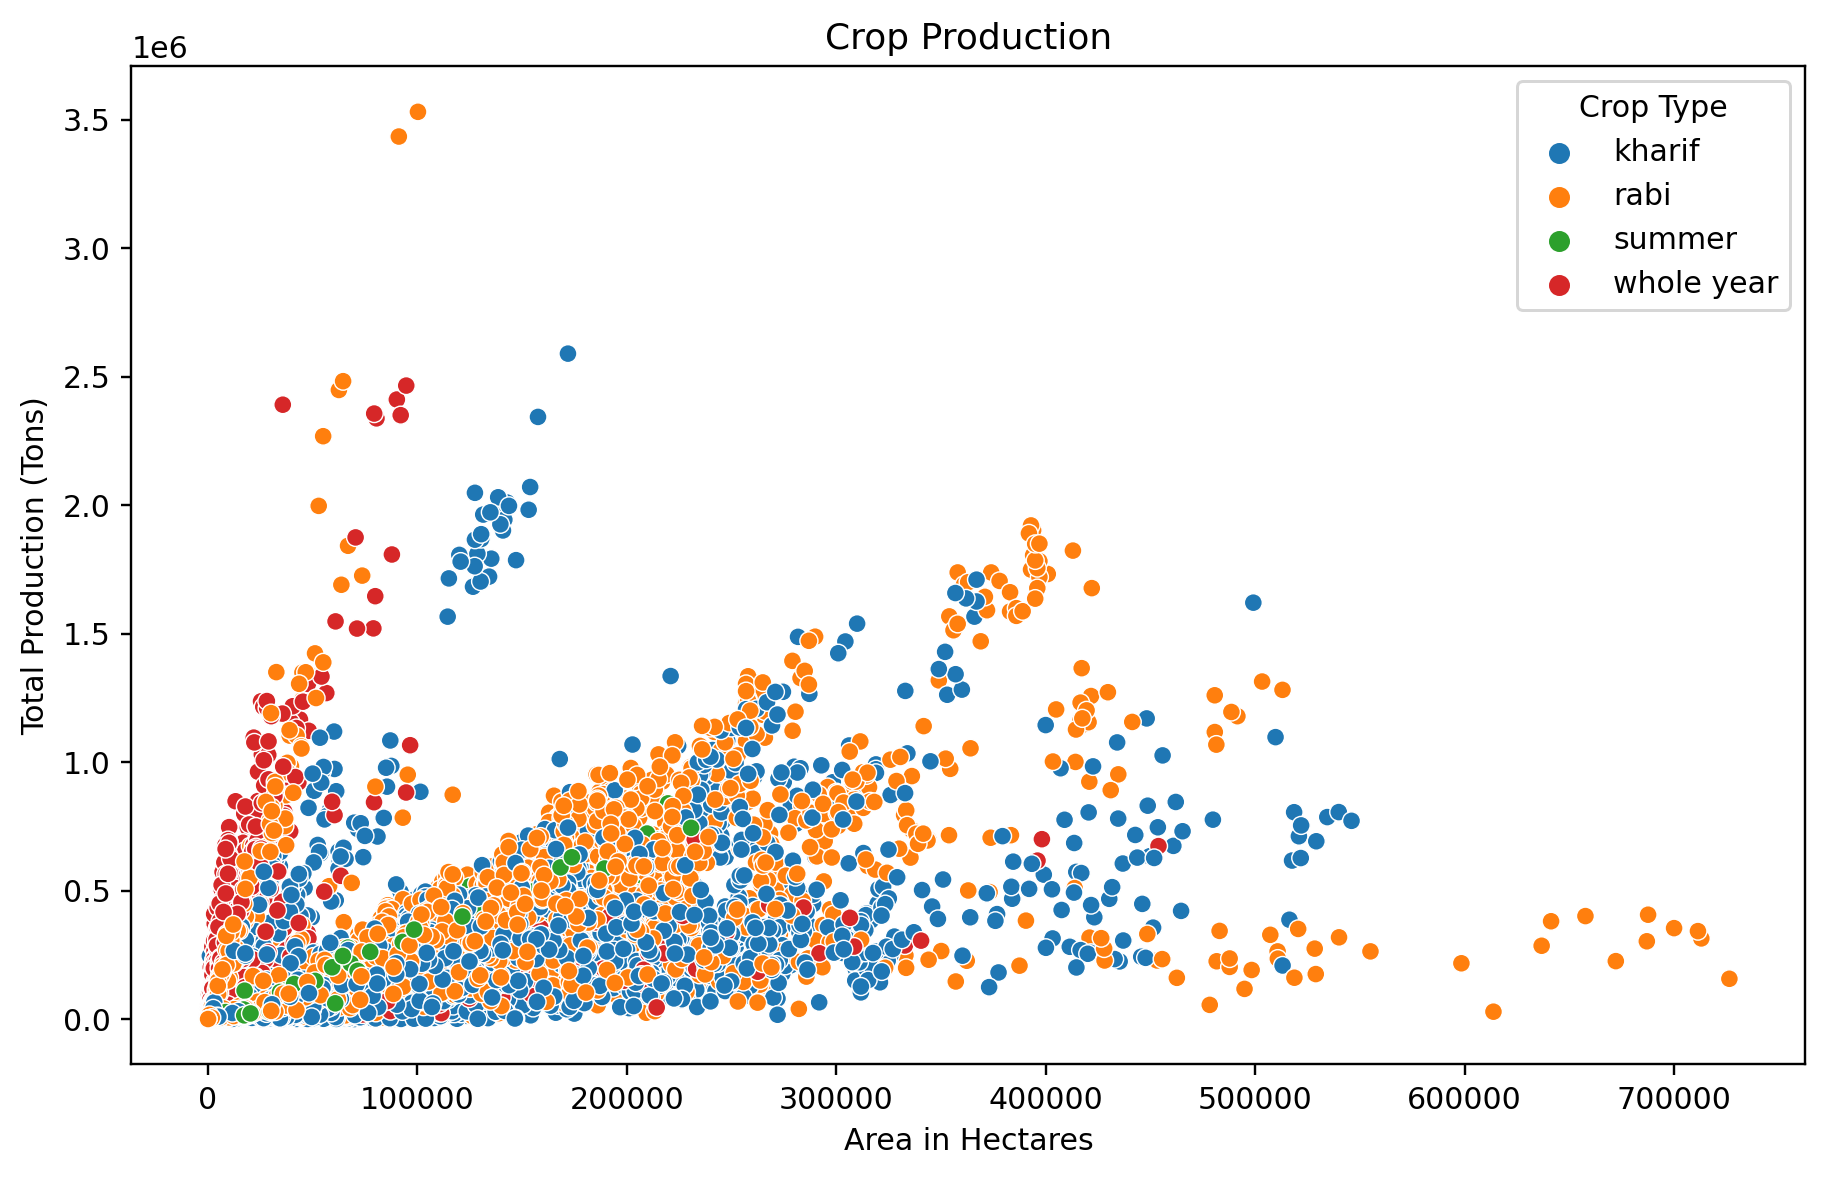

In [15]:
plt.figure(figsize=(10, 6), dpi=216)
sns.scatterplot(x=crop_production['Area_in_hectares'], 
                y=crop_production['Production_in_tons'], hue=crop_production['Crop_Type'])
plt.title('Crop Production')
plt.xlabel('Area in Hectares')
plt.ylabel('Total Production (Tons)')
plt.legend(title='Crop Type');

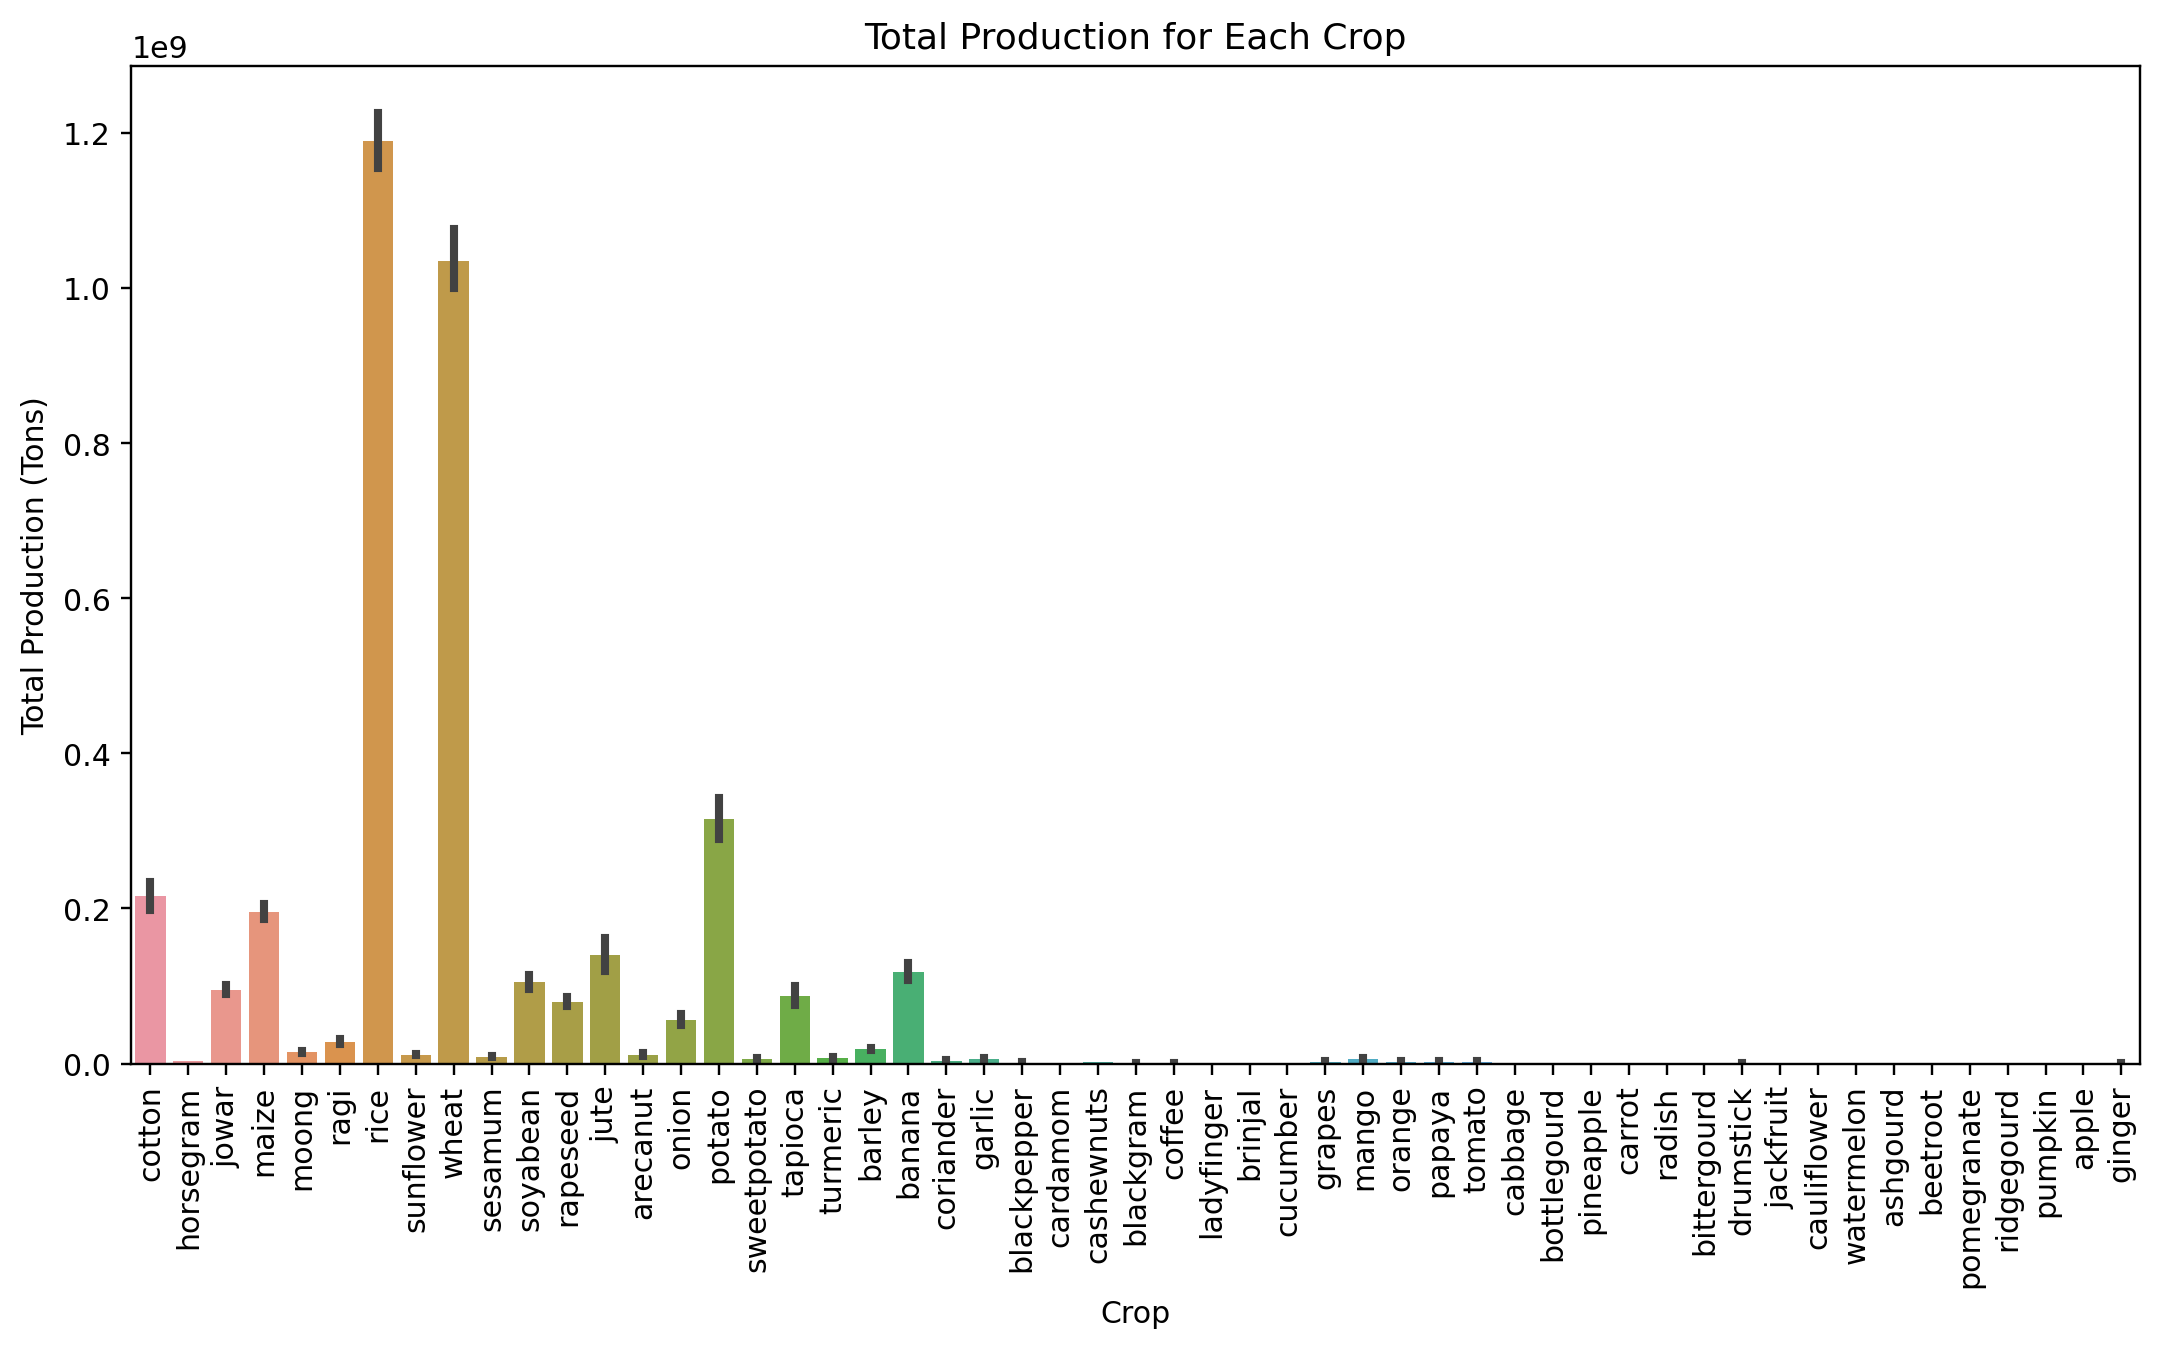

In [16]:
plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=crop_production, x='Crop', y='Production_in_tons', estimator=sum)
plt.xlabel('Crop')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production for Each Crop')
plt.xticks(rotation=90);

### Visualizing which crops have most production!

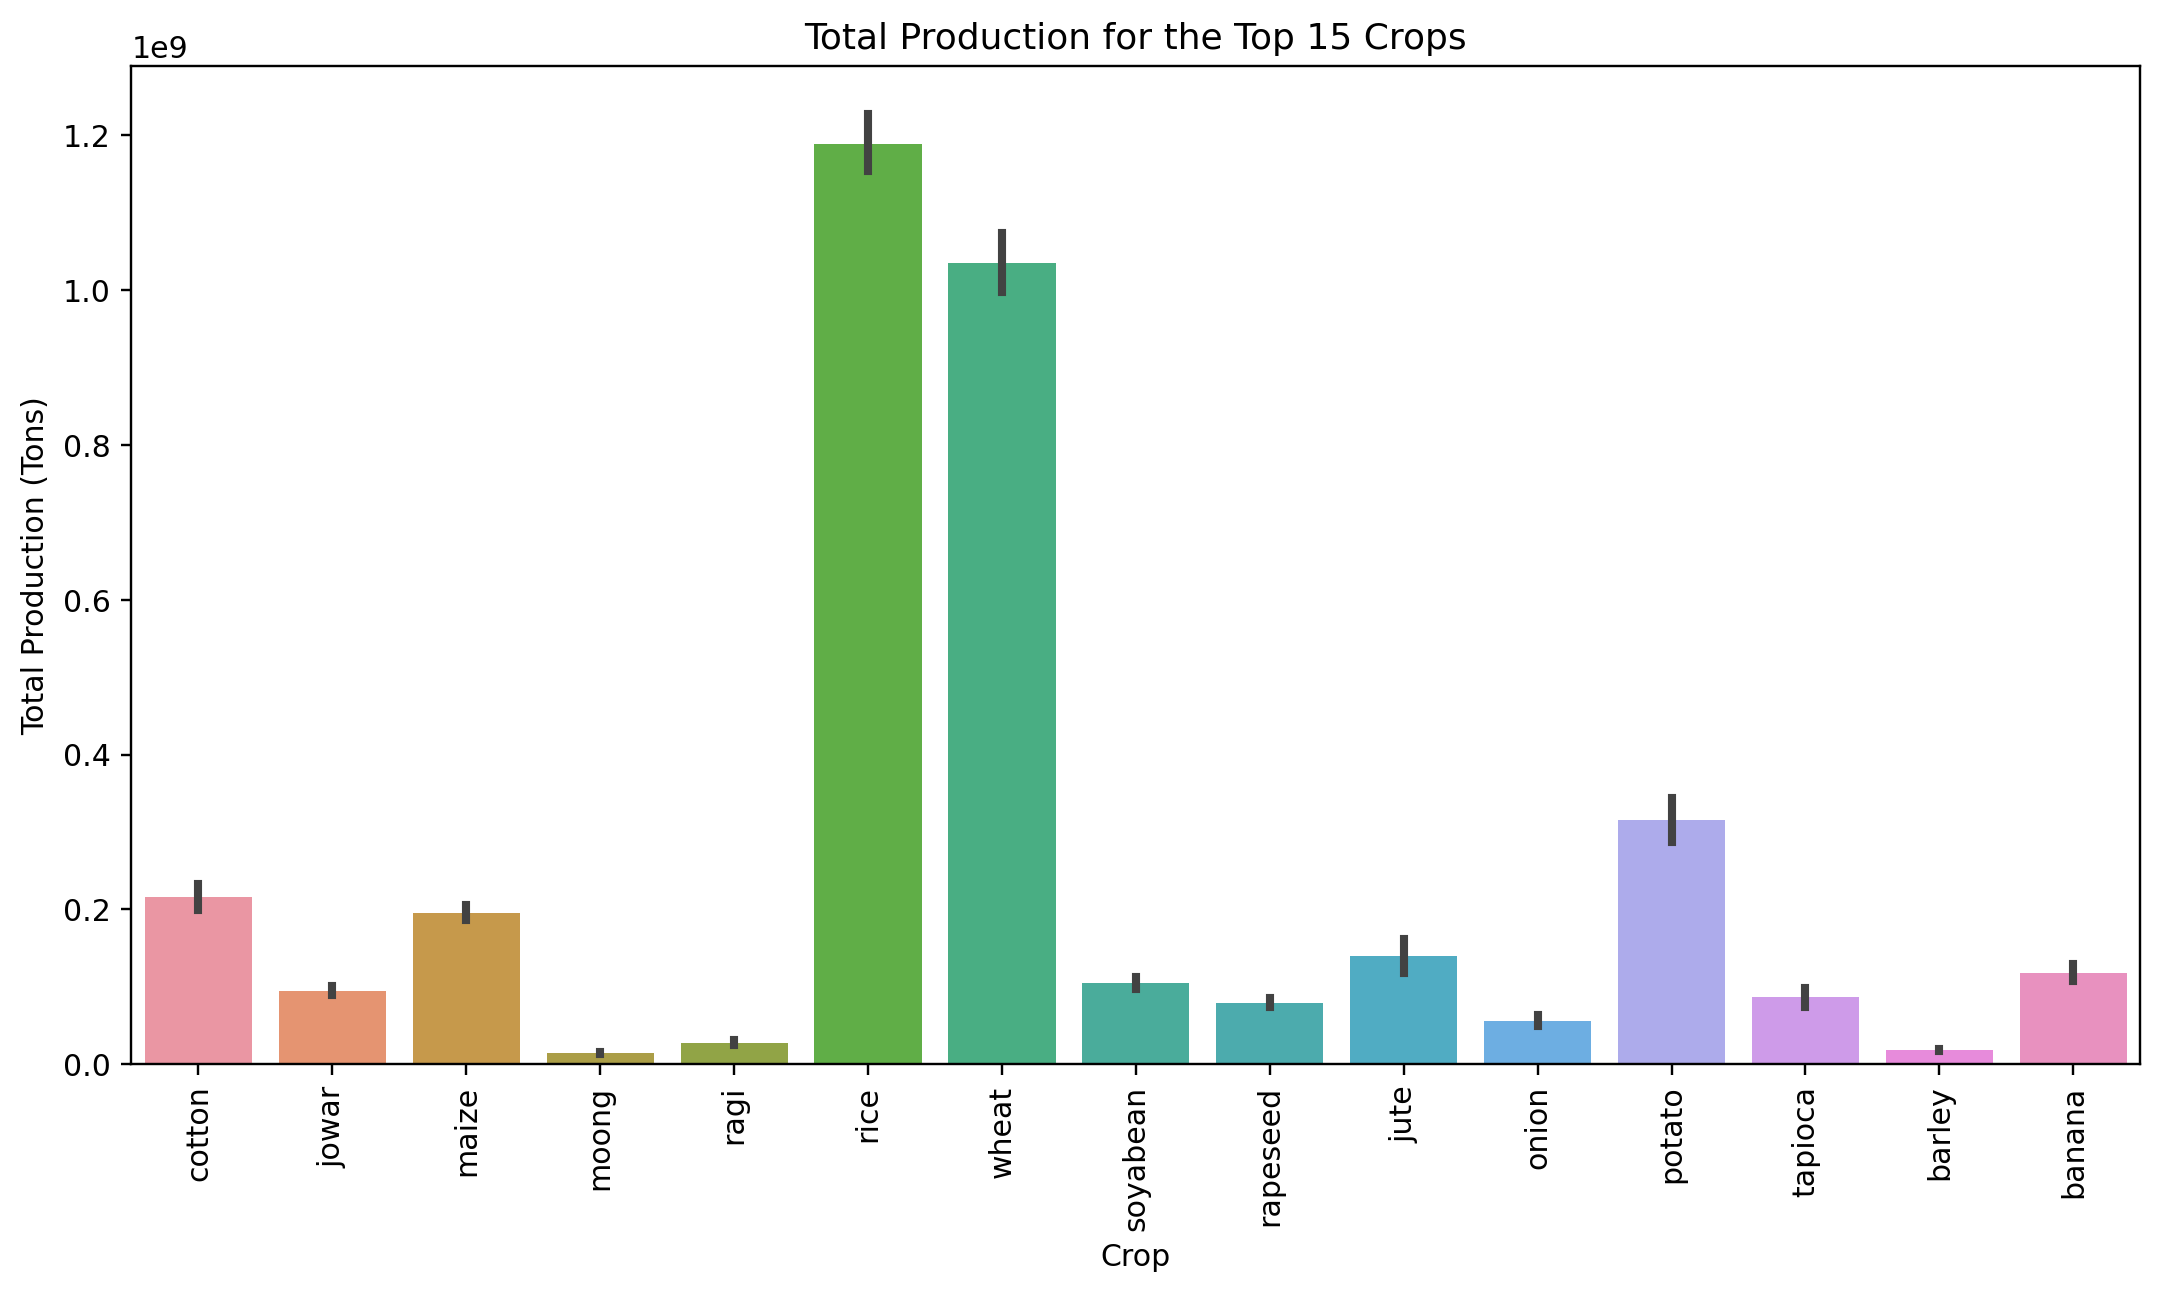

In [17]:
top_15_crops = crop_production.groupby('Crop')['Production_in_tons'].sum().nlargest(15).index
filtered_df = crop_production[crop_production['Crop'].isin(top_15_crops)]

plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=filtered_df, x='Crop', y='Production_in_tons', estimator=sum)
plt.xlabel('Crop')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production for the Top 15 Crops')
plt.xticks(rotation=90);

Here we can see that `Rice` and `Wheat` productions are more than 1 ton in plot.

### Visualizing which state producing more production!

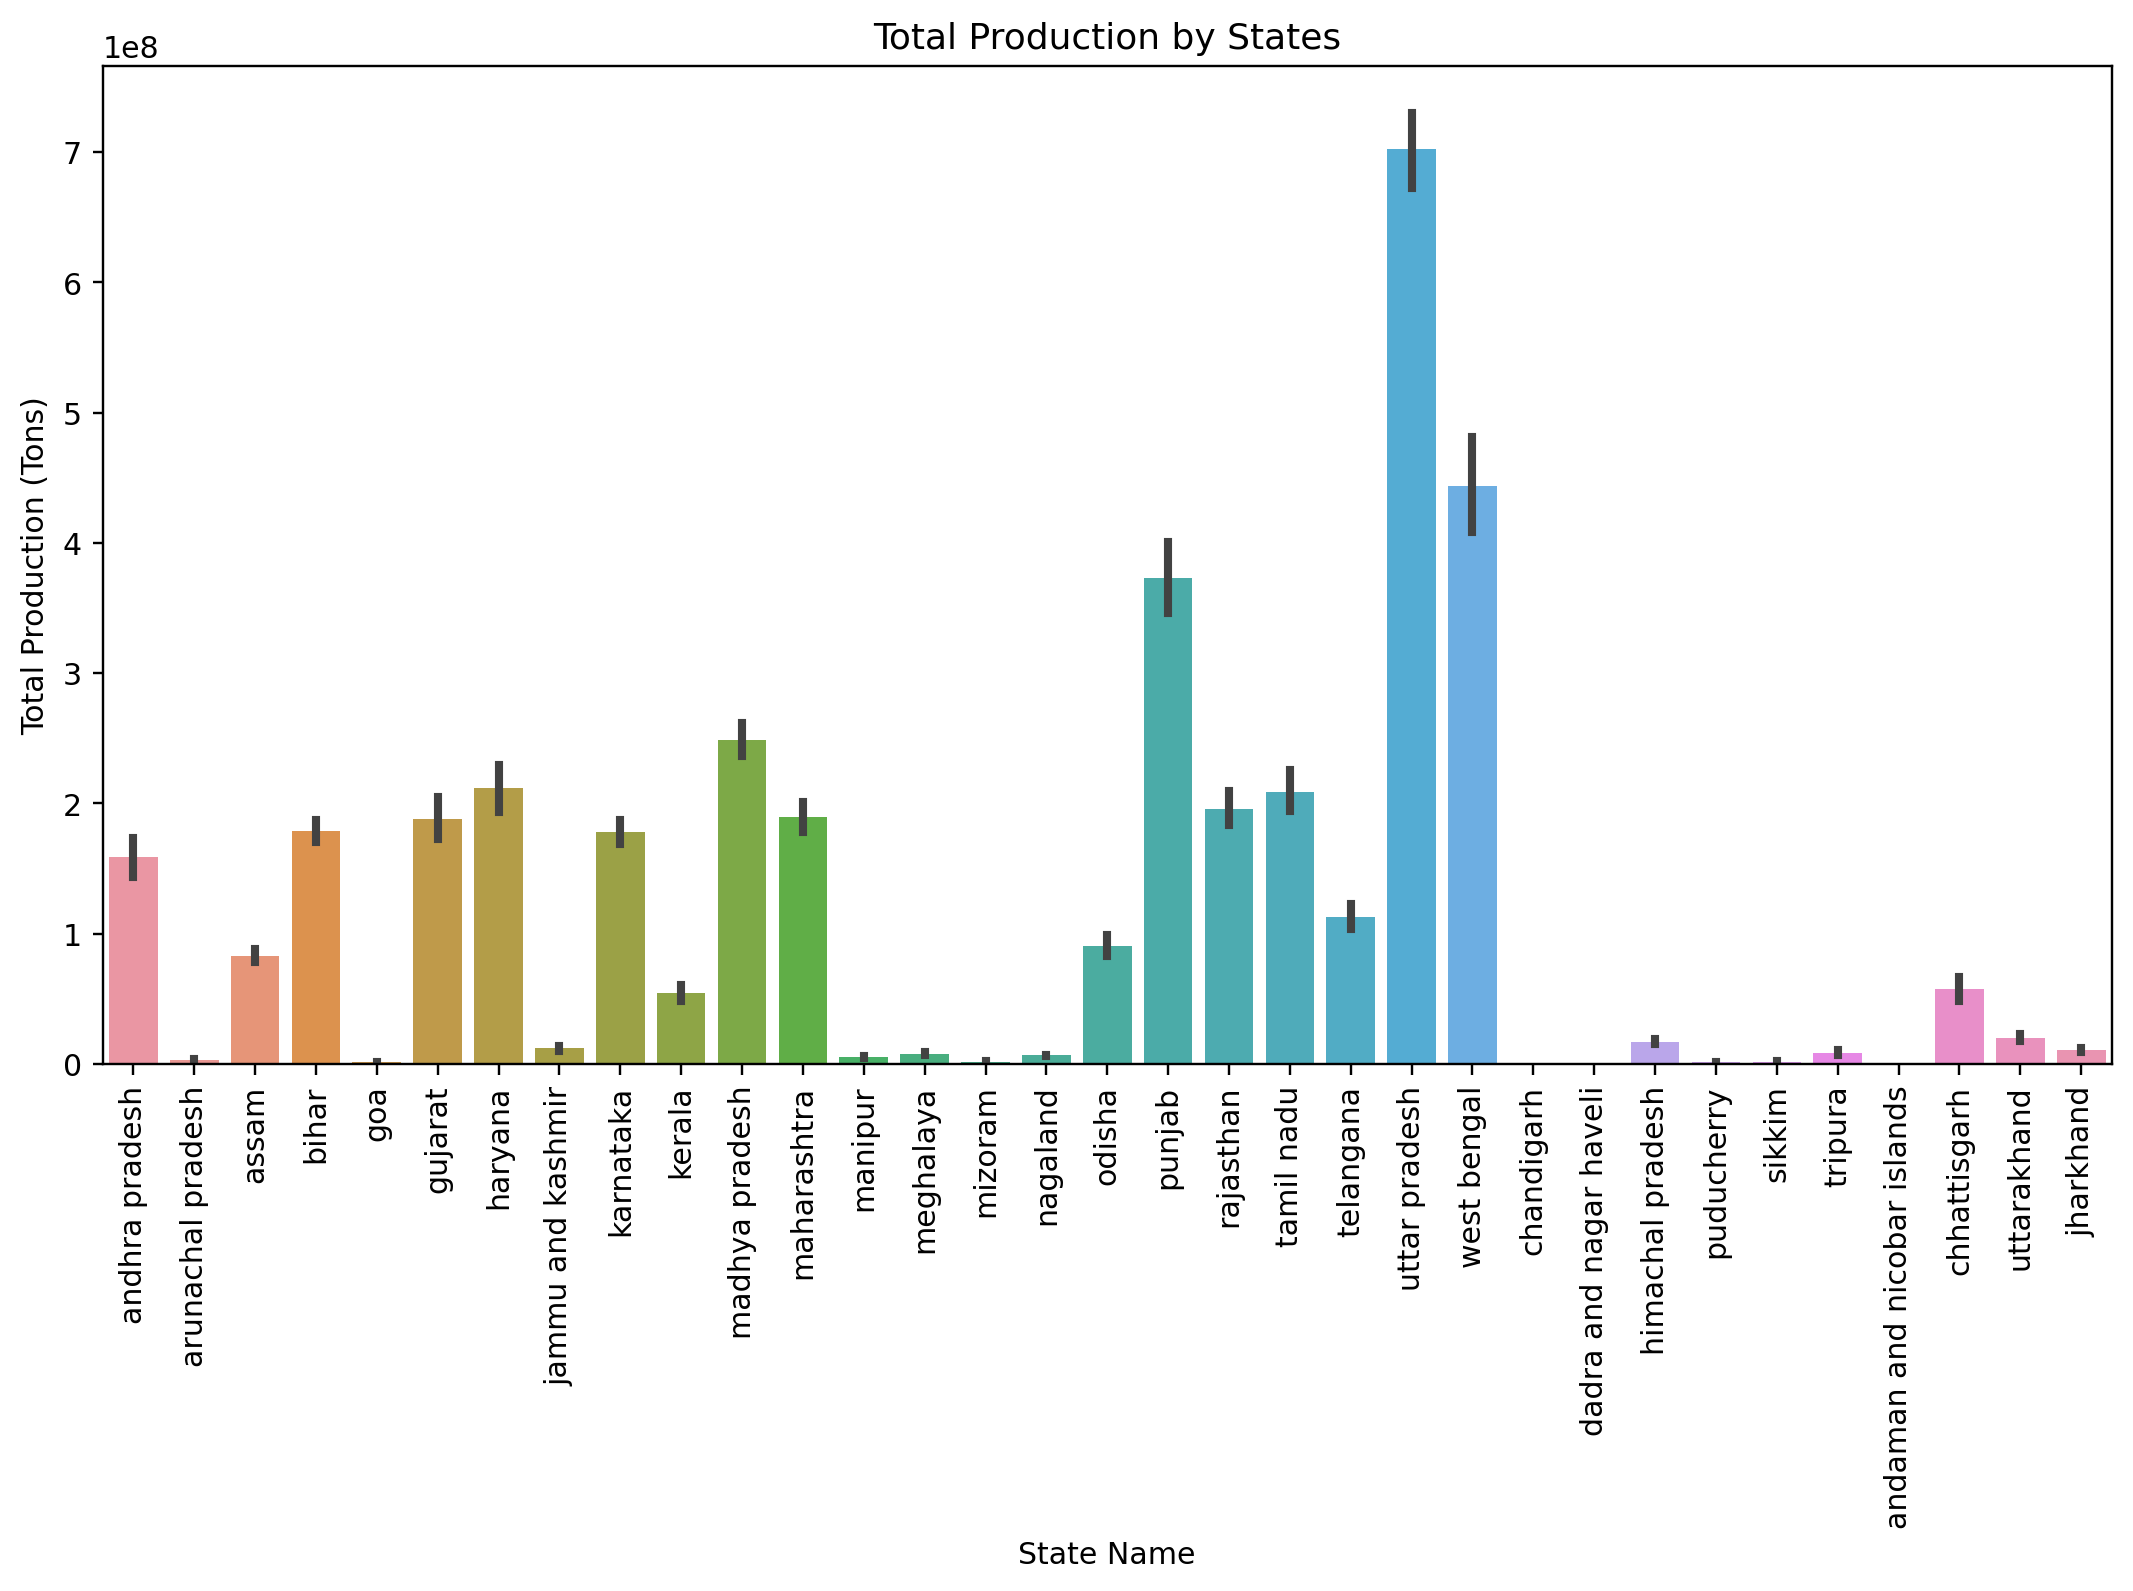

In [18]:
plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=crop_production, x='State_Name', y='Production_in_tons', estimator=sum)
plt.xlabel('State Name')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production by States')
plt.xticks(rotation=90);

Now we can see in plot that `Uttar Pradesh, West Bengal` and `Panjab` have most productions.

### Visualizing Yeild Ton per Hectare!

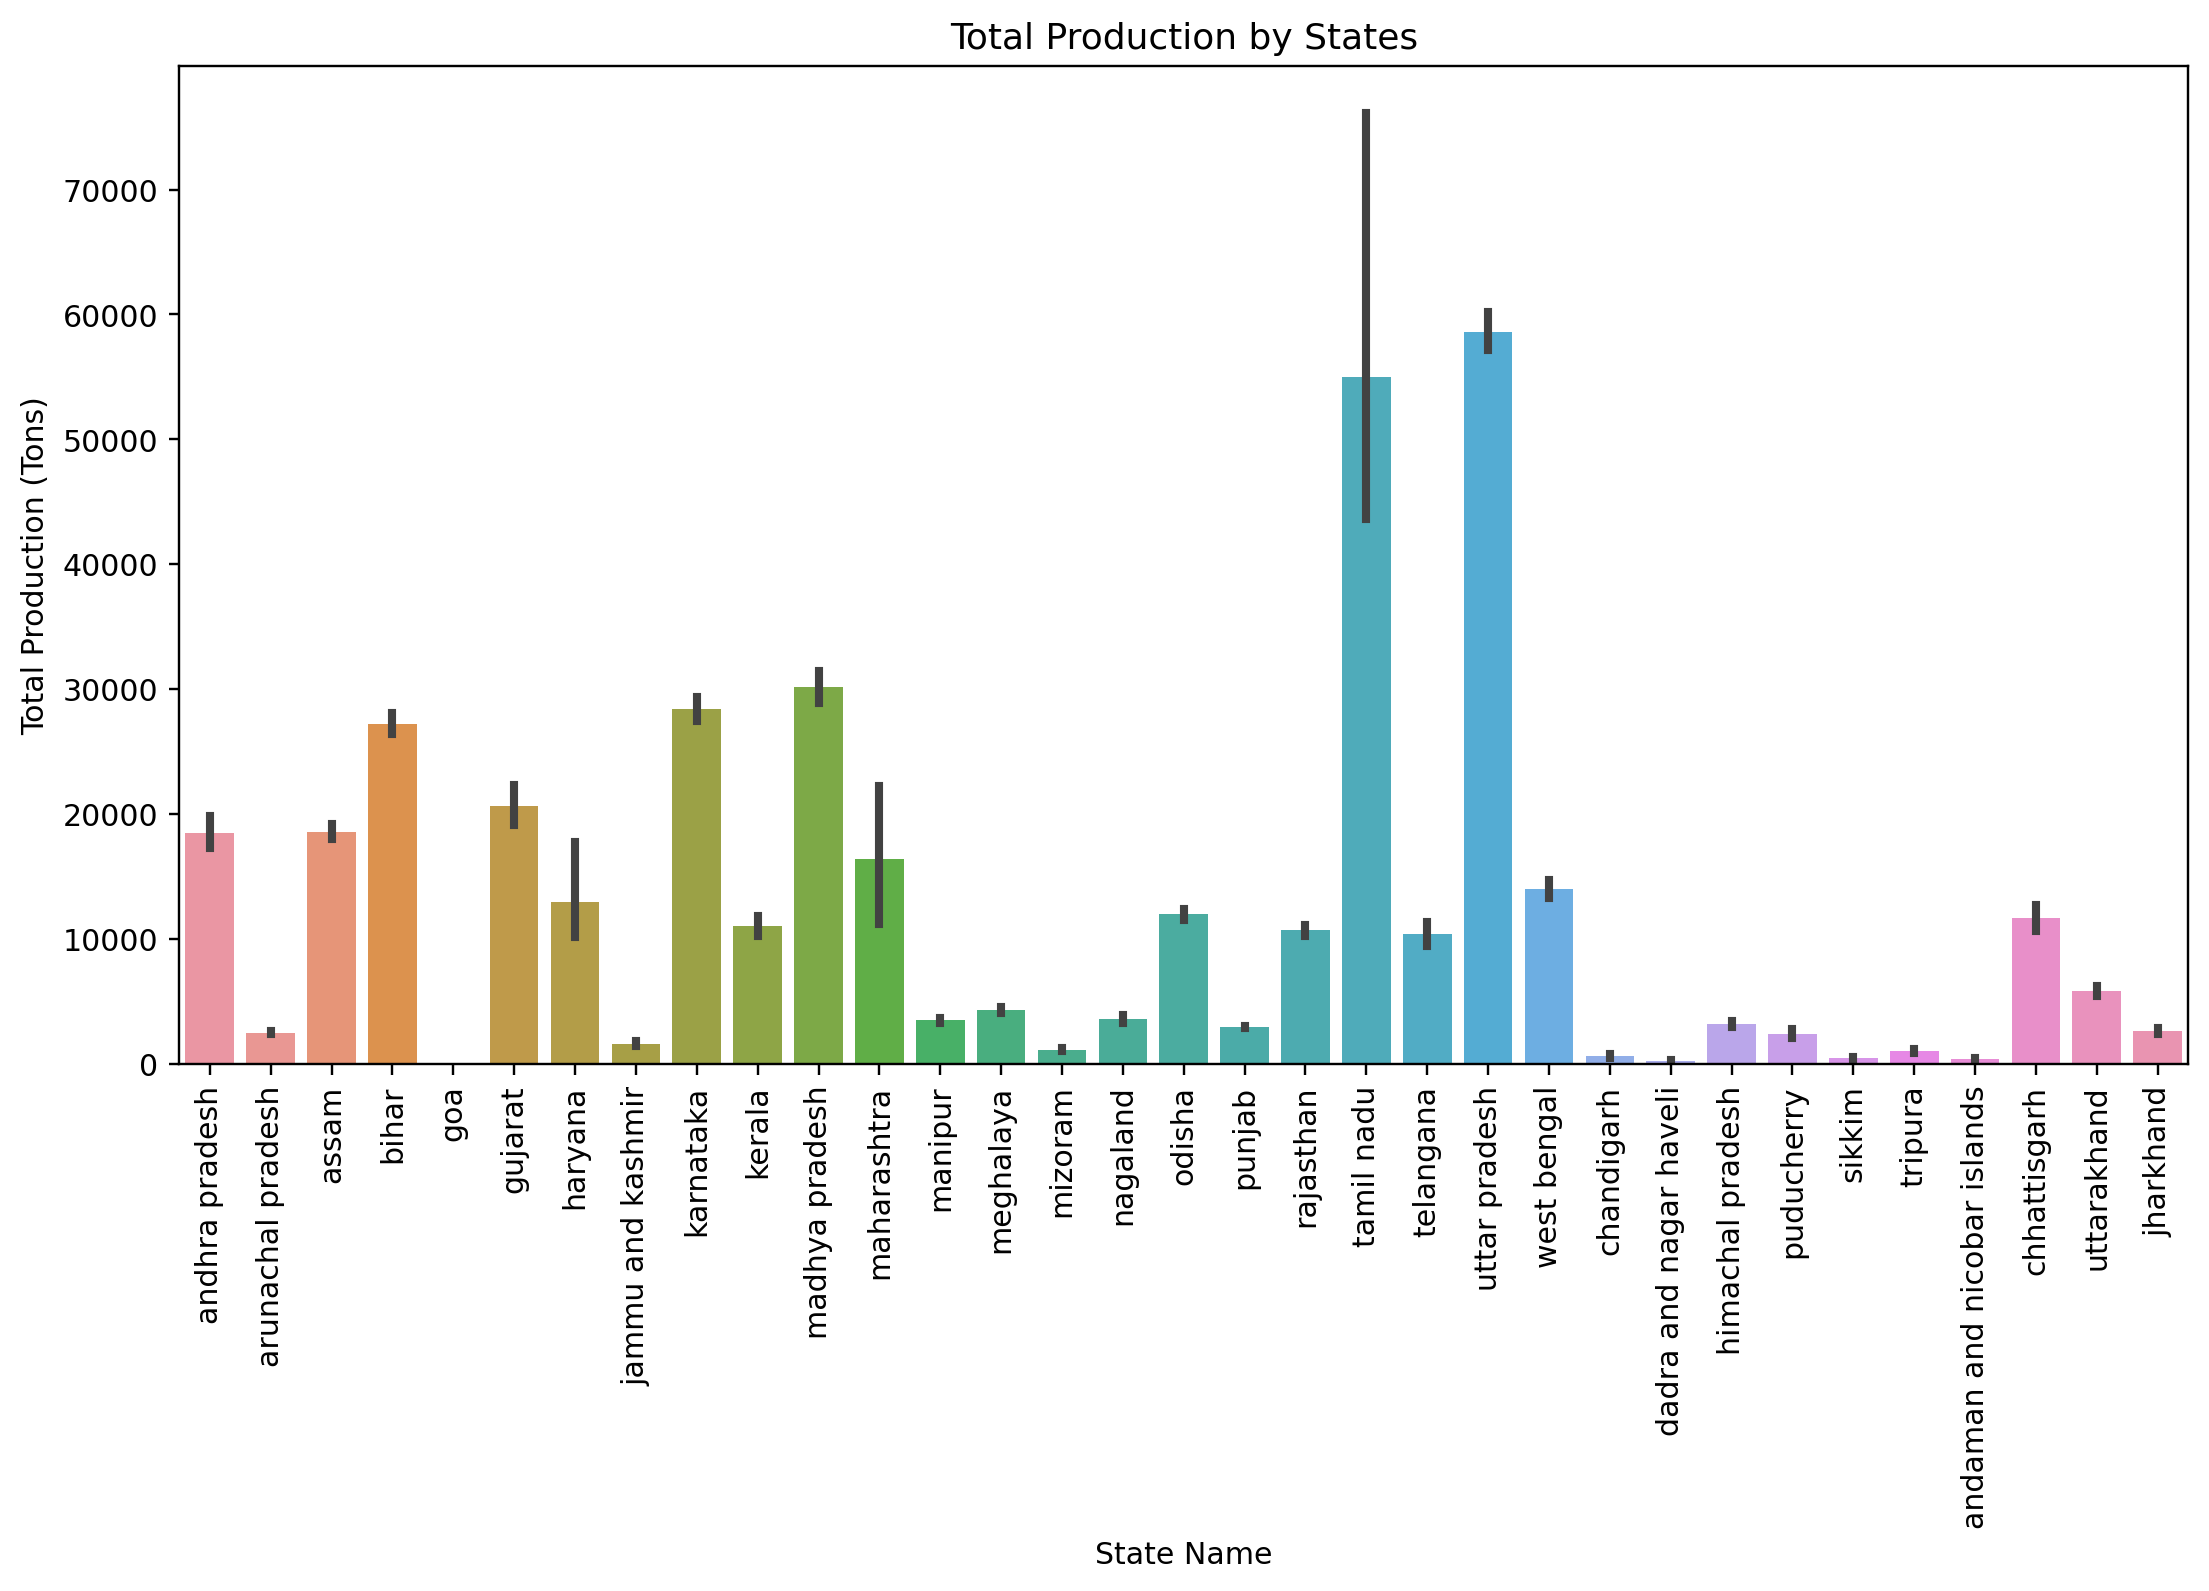

In [19]:
plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=crop_production, x='State_Name', y='Yield_ton_per_hec', estimator=sum)
plt.xlabel('State Name')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production by States')
plt.xticks(rotation=90);

Next we can see that `Uttar Pradesh` and `Tamil Nadu` have most yield ton per hectares.

In [20]:
crop_production.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

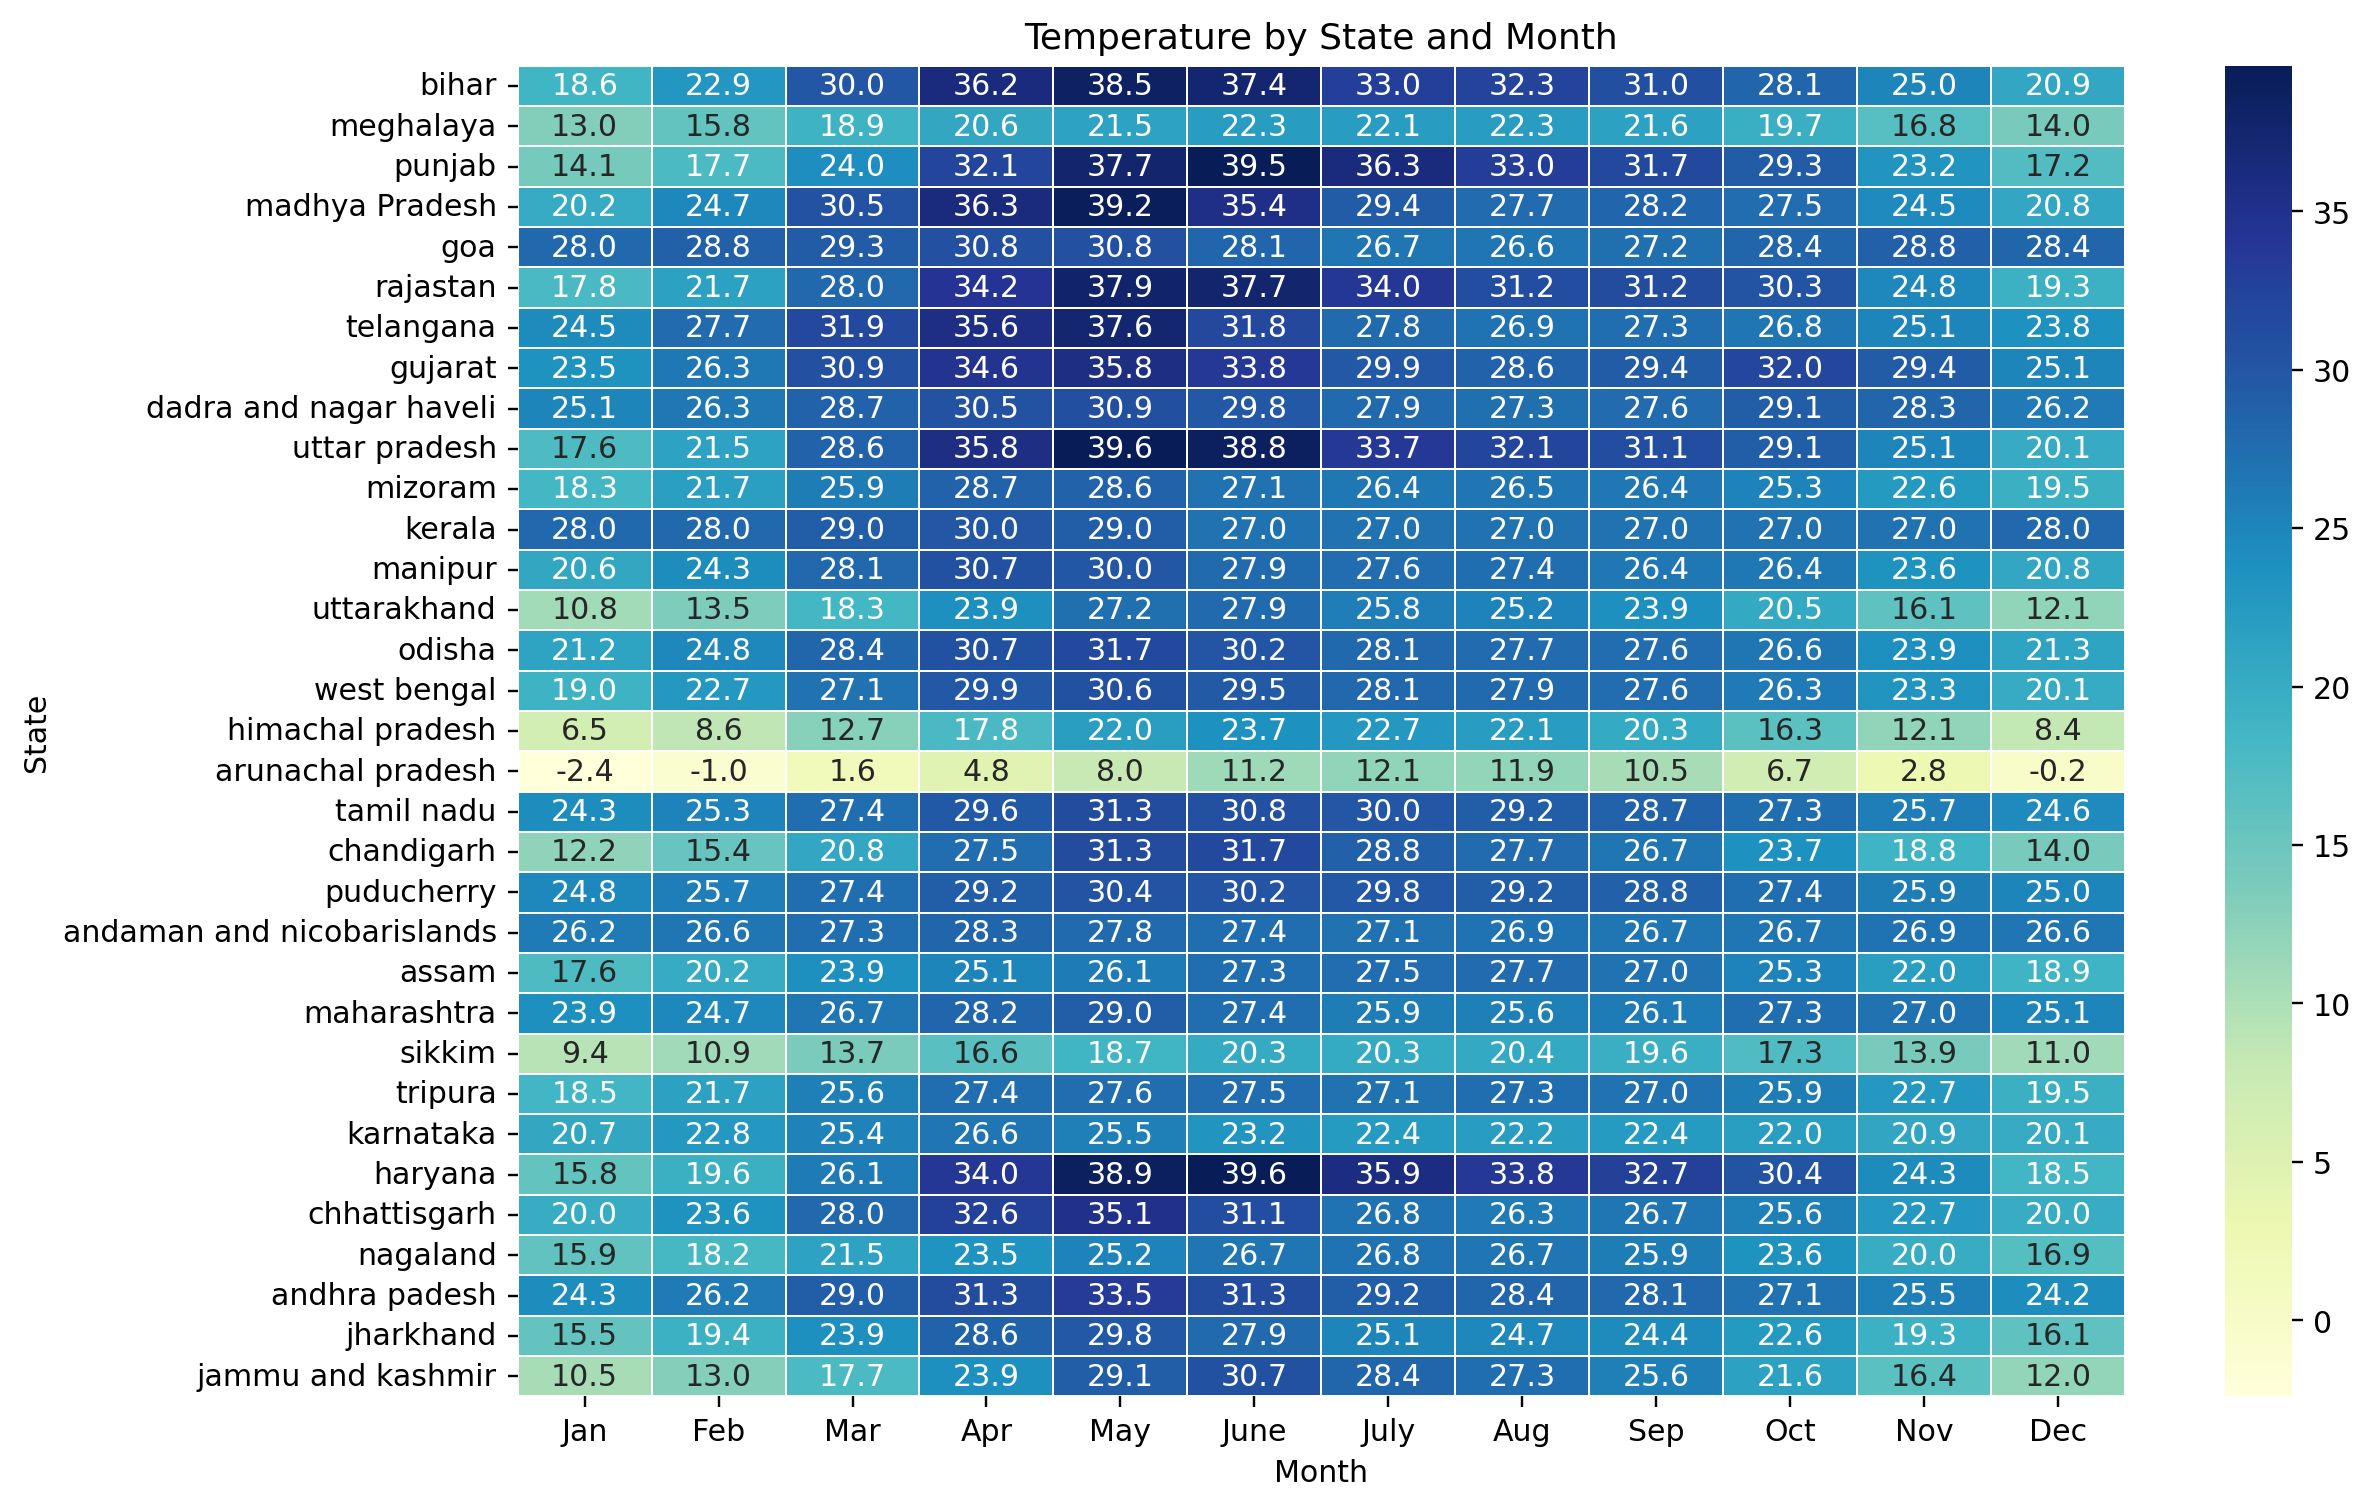

In [21]:
plt.figure(figsize=(12, 8), dpi=216)
data = temp[['State', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
data.set_index('State', inplace=True)
sns.heatmap(data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5)
plt.xlabel('Month')
plt.ylabel('State')
plt.title('Temperature by State and Month');

<Figure size 2592x1728 with 0 Axes>

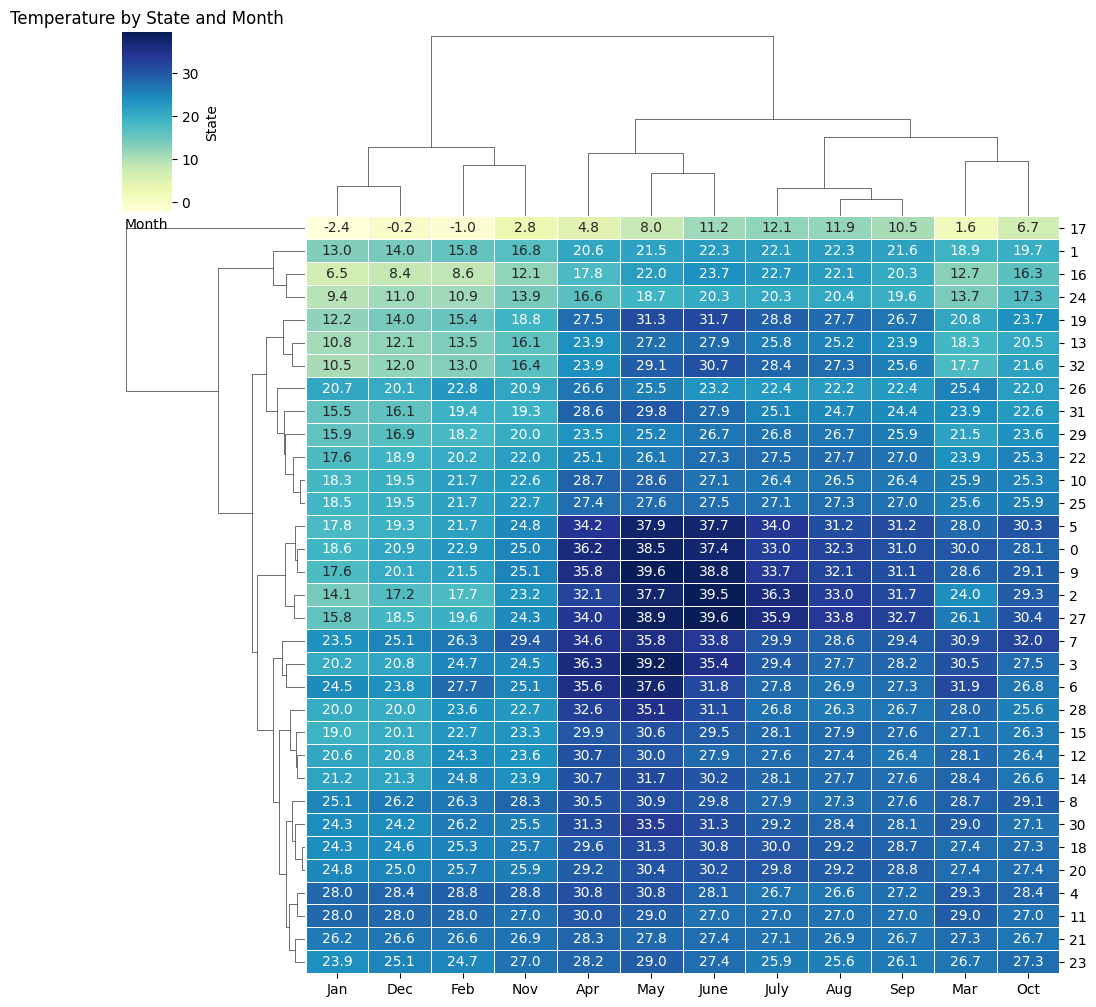

In [22]:
plt.figure(figsize=(12, 8), dpi=216)
data = temp[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
sns.clustermap(data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.xlabel('Month')
plt.ylabel('State')
plt.title('Temperature by State and Month');

In [23]:
temp.columns

Index(['State', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

<Figure size 1382.4x1036.8 with 0 Axes>

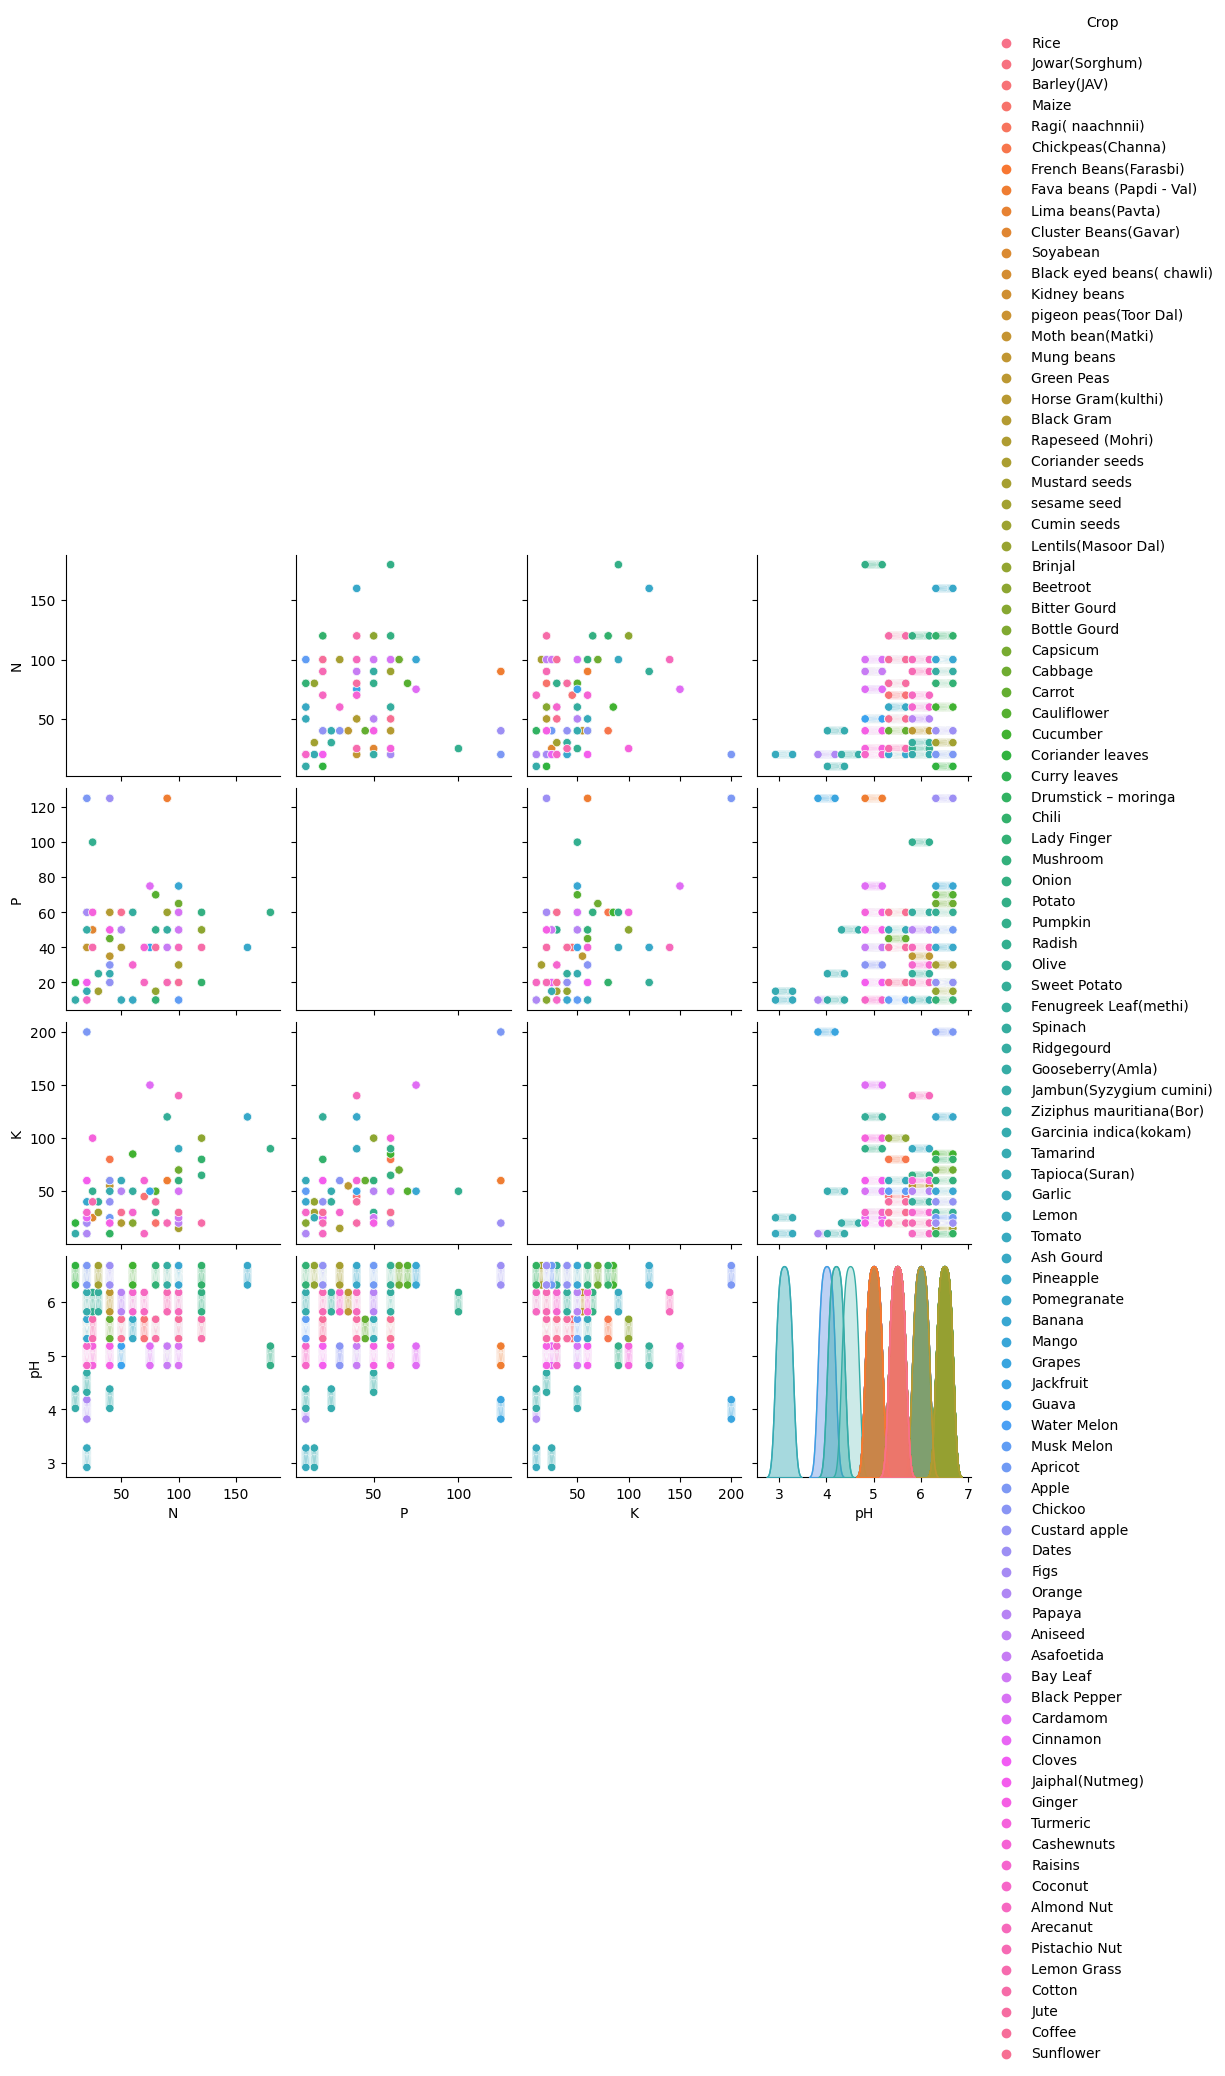

In [24]:
plt.figure(dpi=216)
sns.pairplot(fertilizer, hue='Crop', diag_kind='kde');

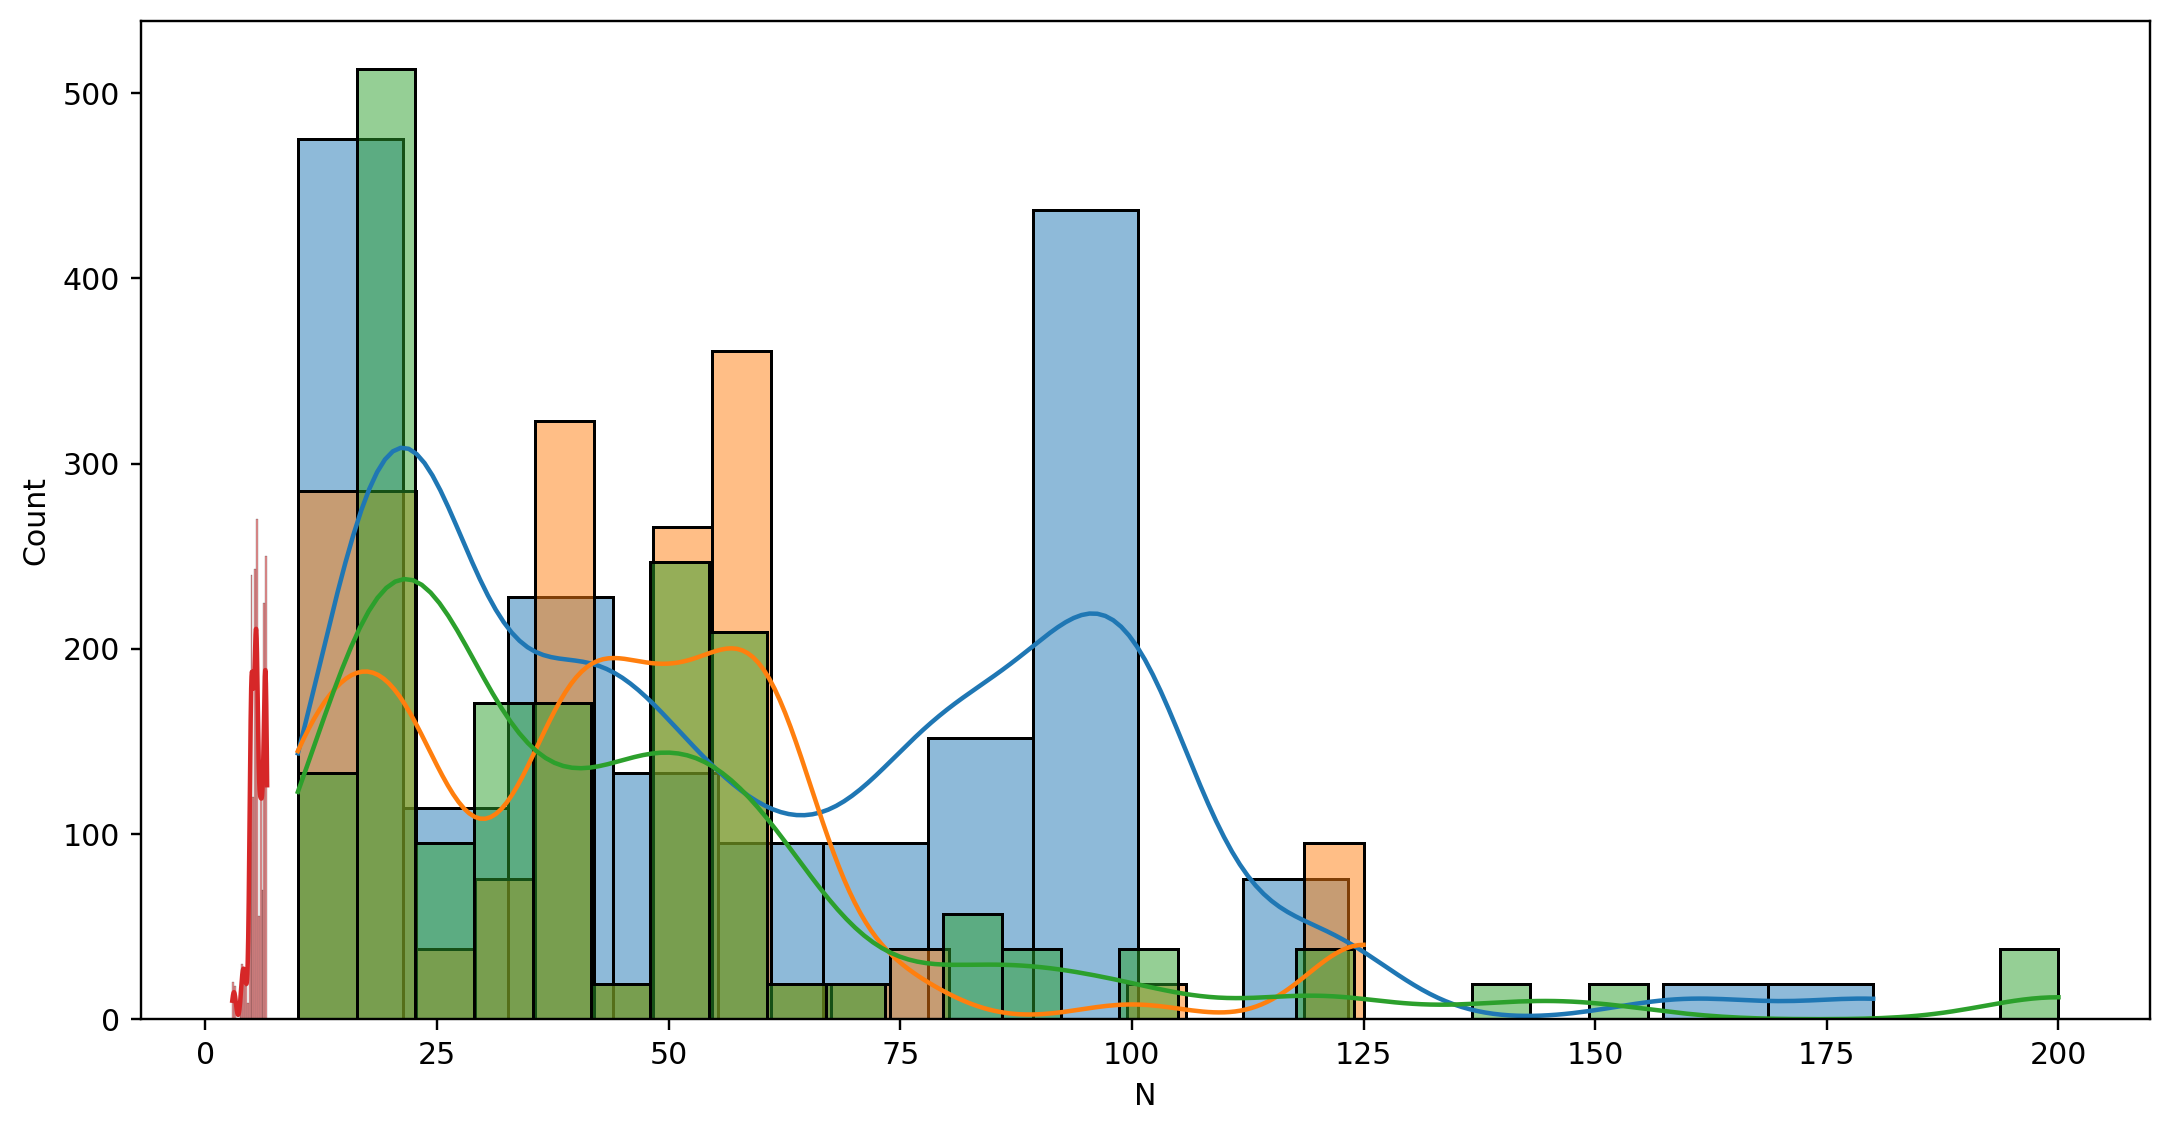

In [25]:
plt.figure(figsize=(12, 6), dpi=216)
sns.histplot(data=fertilizer, x='N', kde=True)
sns.histplot(data=fertilizer, x='P', kde=True)
sns.histplot(data=fertilizer, x='K', kde=True)
sns.histplot(data=fertilizer, x='pH', kde=True);

### Visualizing which crop time have most rainfall!

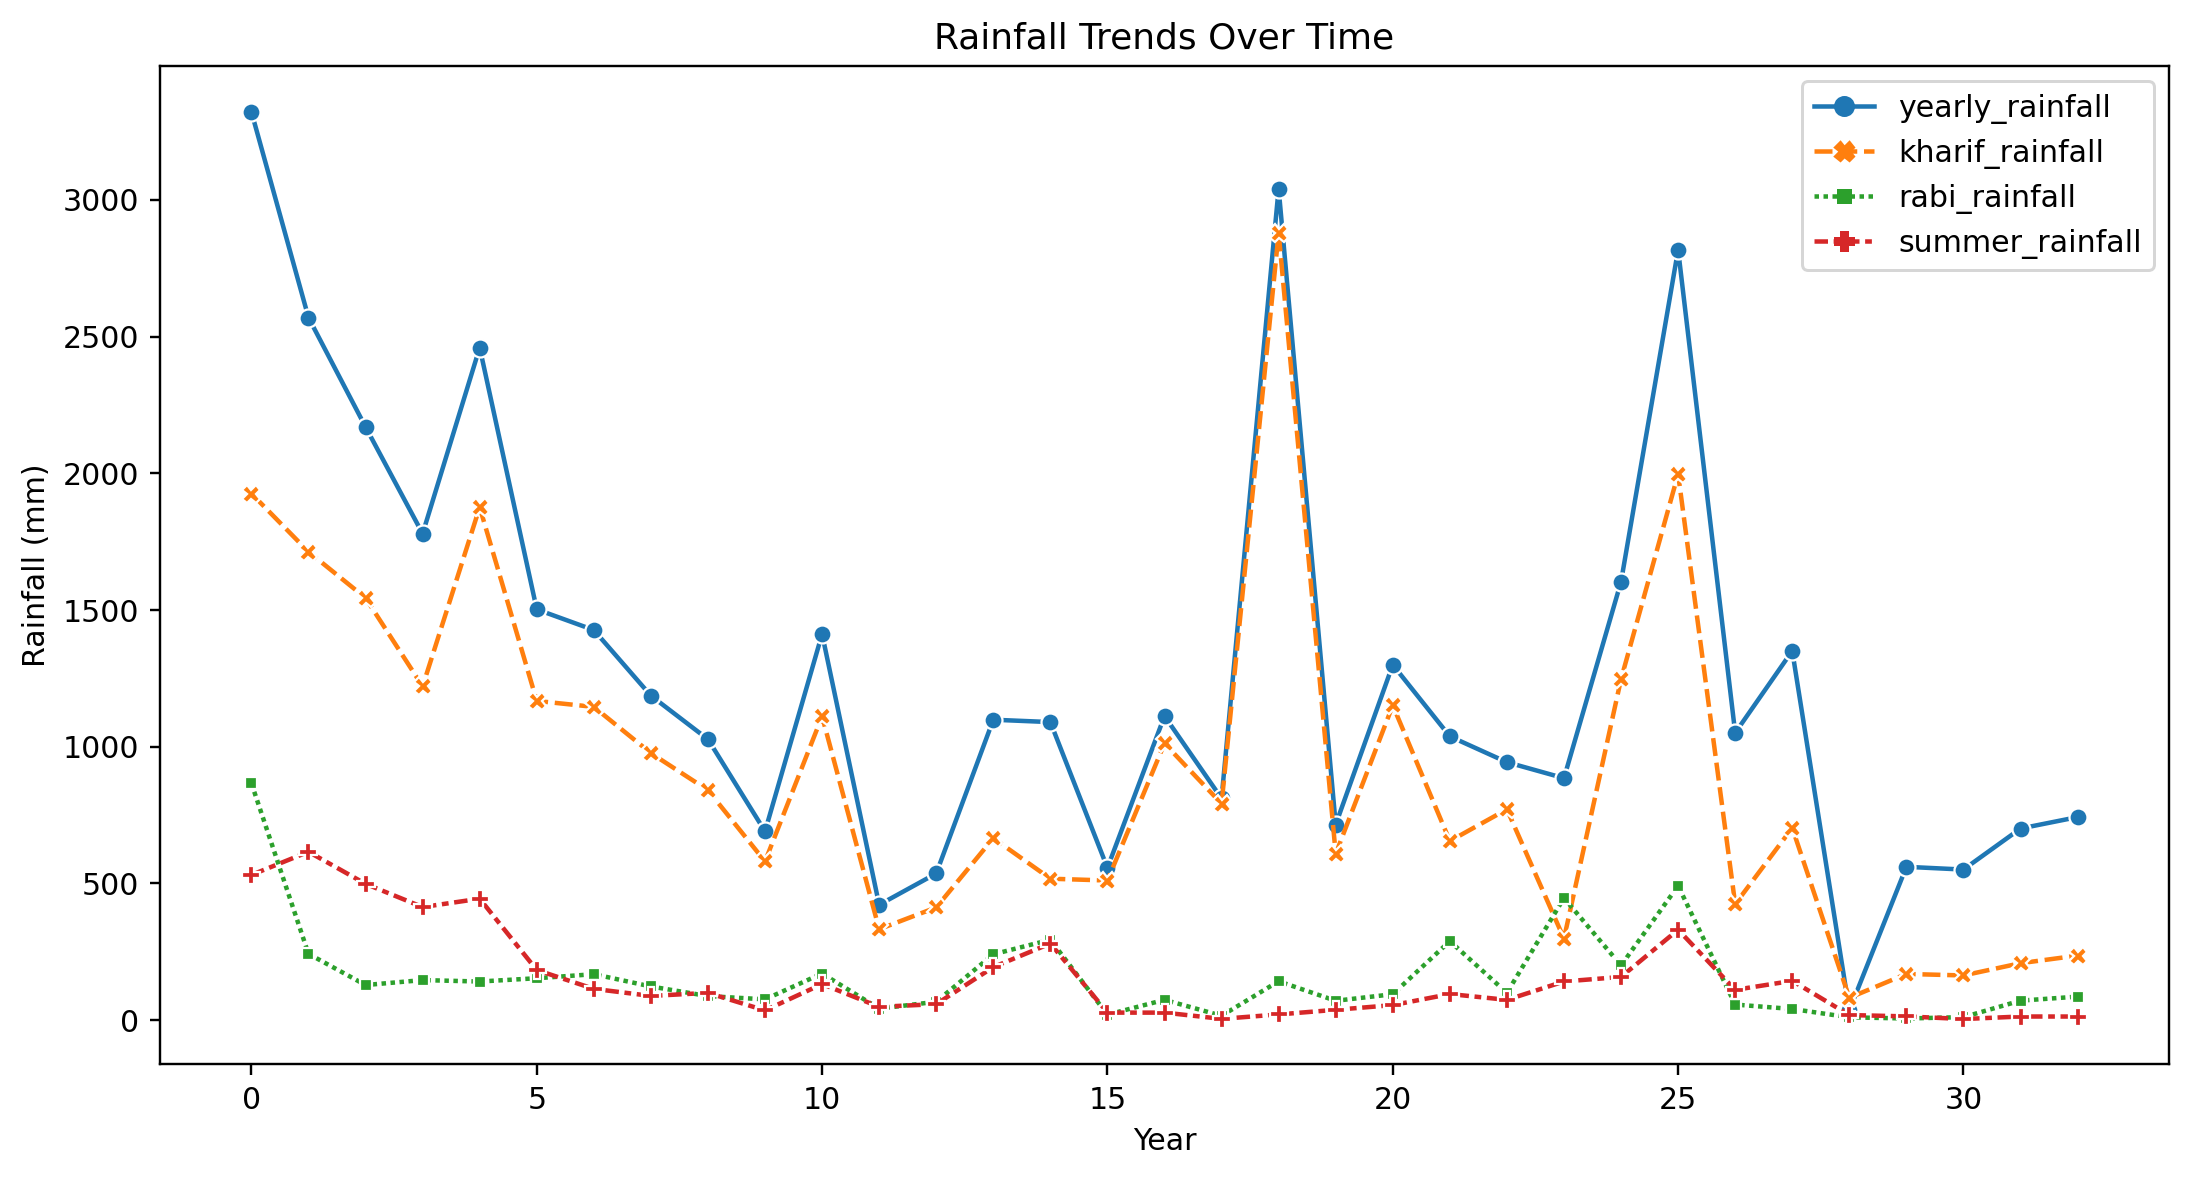

In [26]:
plt.figure(figsize=(12, 6), dpi=216)
sns.lineplot(data=rainfall, markers=True)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends Over Time');

And we can see that `Kharif` crops time have most rainfall because them need more water to grow.

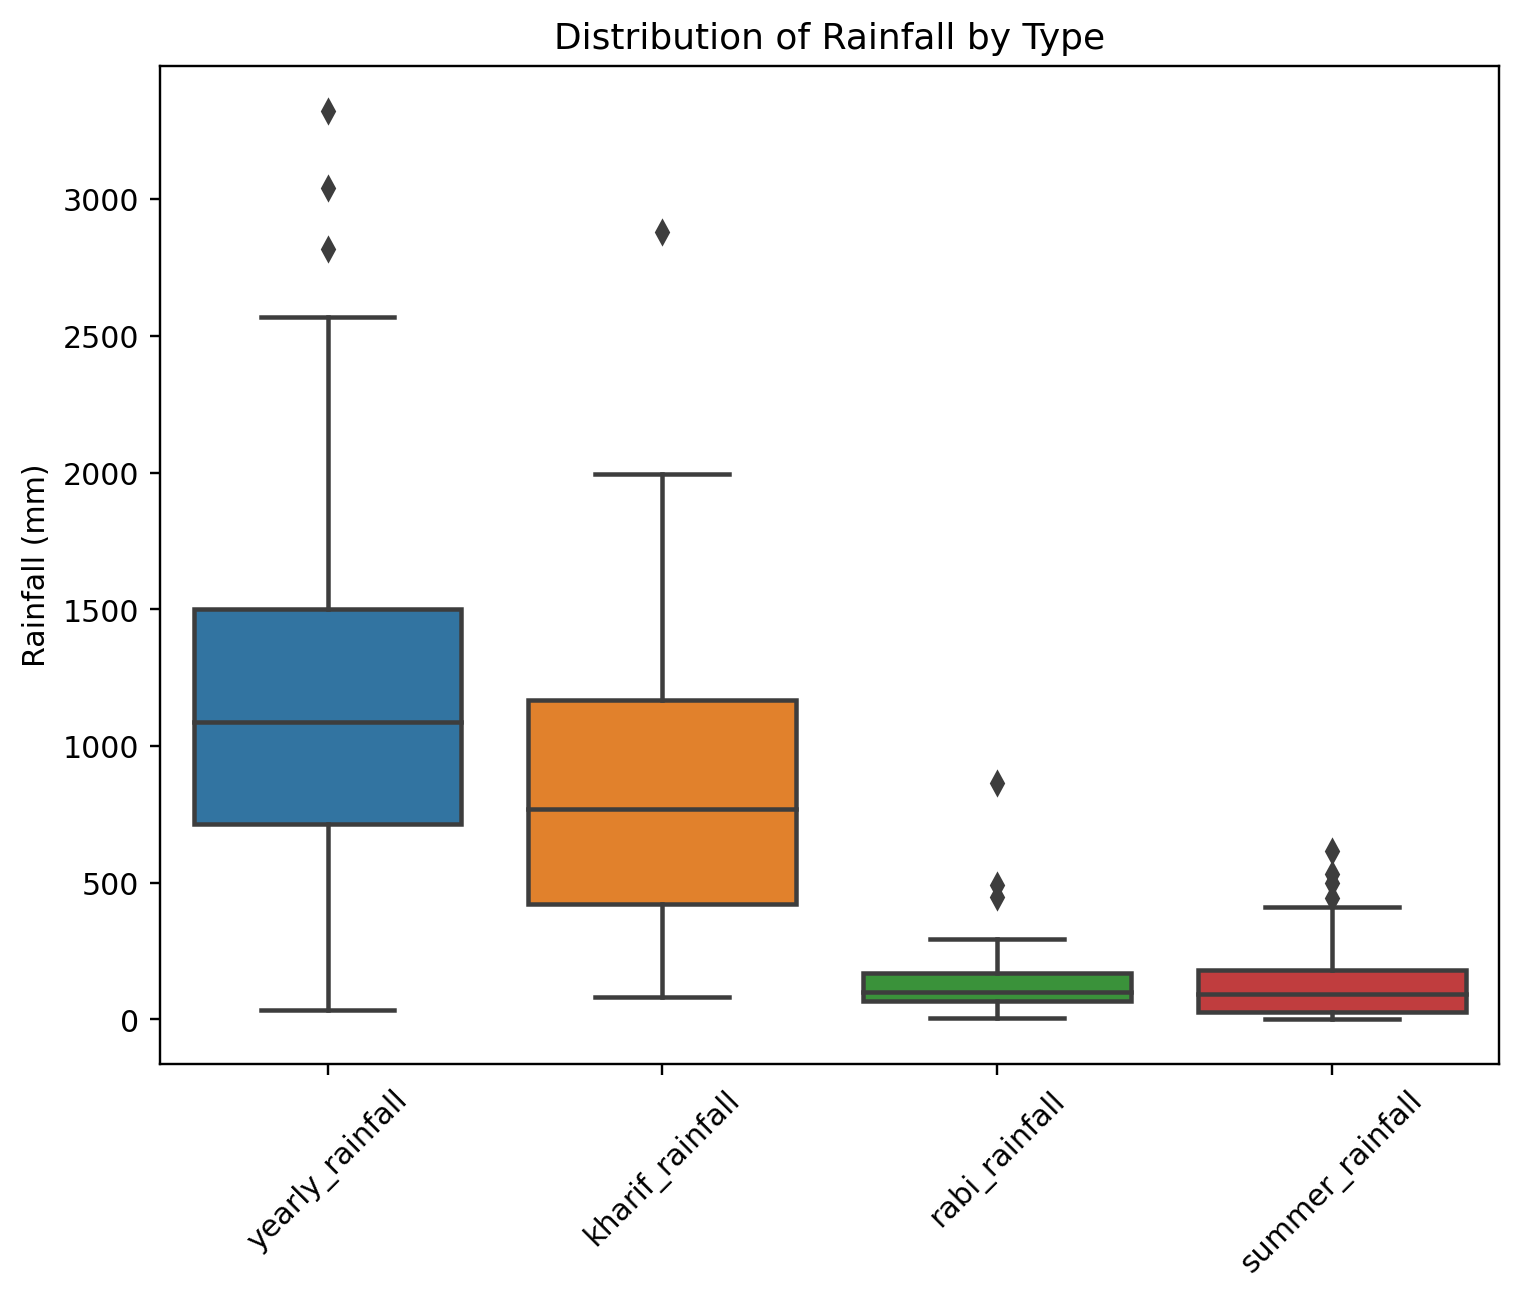

In [27]:
plt.figure(figsize=(8, 6), dpi=216)
sns.boxplot(data=rainfall, orient='vertical')
plt.ylabel('Rainfall (mm)')
plt.title('Distribution of Rainfall by Type')
plt.xticks(rotation=45);

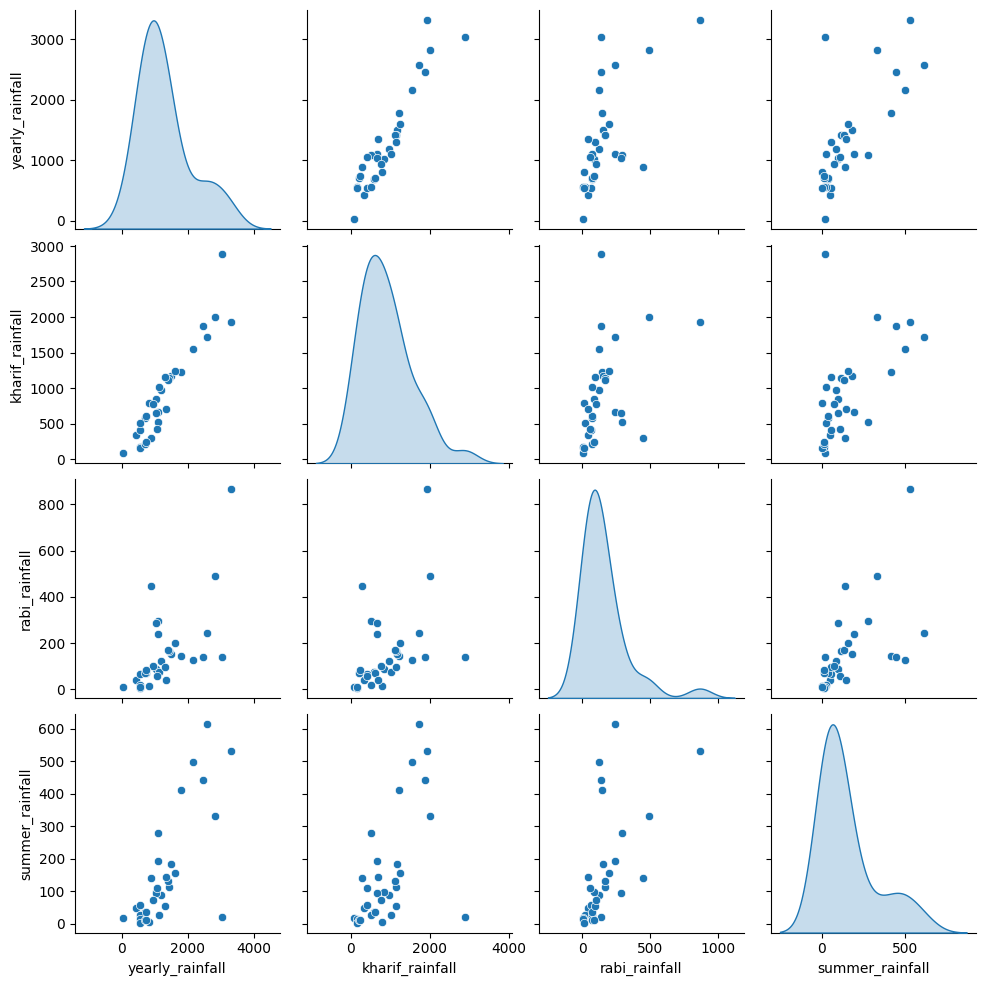

In [28]:
sns.pairplot(rainfall, diag_kind='kde')

<Figure size 1728x1296 with 0 Axes>

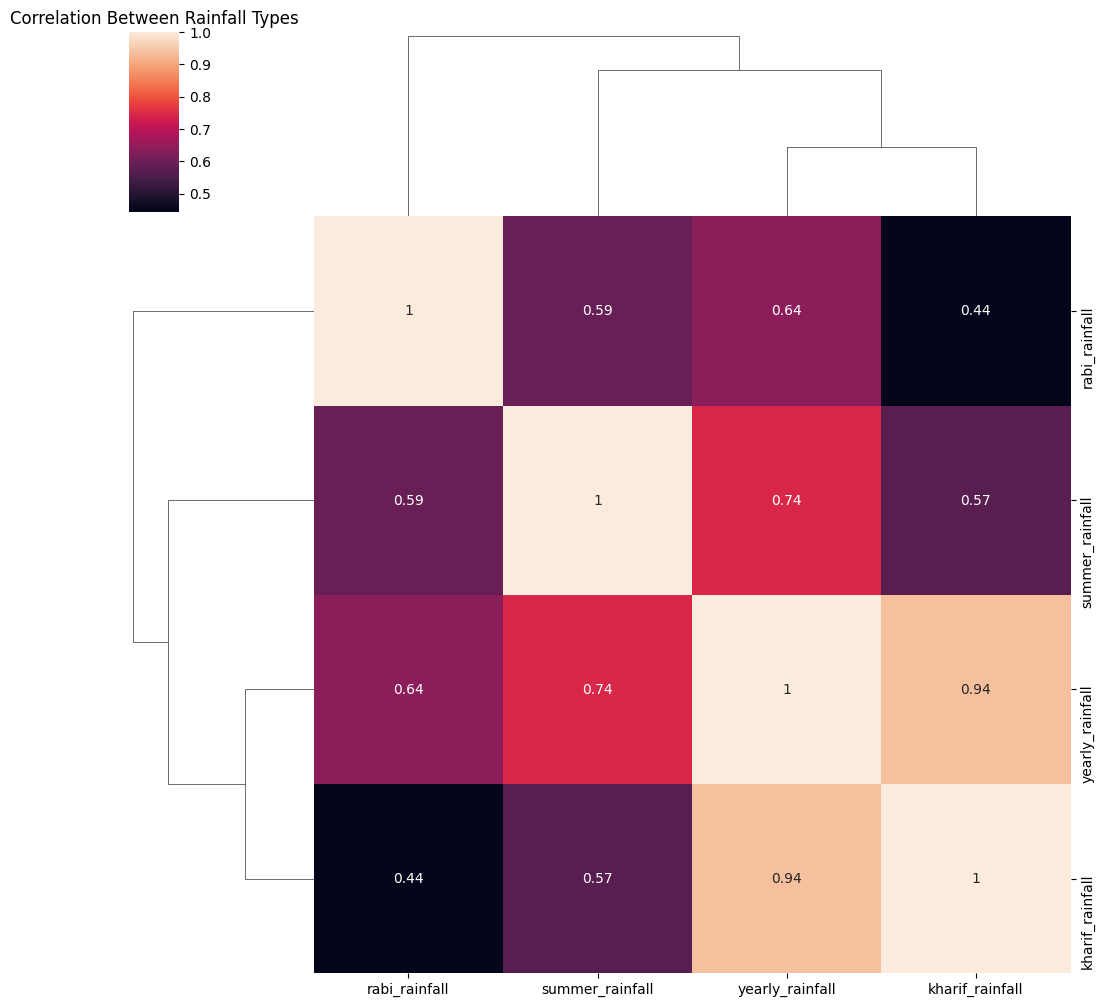

In [29]:
correlation_matrix = rainfall.corr()
plt.figure(figsize=(8, 6), dpi=216)
sns.clustermap(correlation_matrix, annot=True)
plt.title('Correlation Between Rainfall Types');

# Overview

In the above notebook by the datasets, 
- We saw which crop have most production.
- Which state production most crops by hectares and yield ton per hectares.
- We saw in rainfall datasets that which crops need most water to grow.